In [14]:
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
# Filter the data for ATIS and TREC
df = pd.read_csv("classifiers/training_results.csv")
atis_data = df[df['data'].str.contains('atis')]
trec_data = df[df['data'].str.contains('trec')]

In [16]:
df.head()

,data,model,val_accuracy
0,atis_50_subset,svm_tfidf,0.8714
1,atis_50_subset,svm_glove,0.7444
2,atis_50_subset,lstm_glove,0.8353
3,atis_50_subset,bert_ktrain,0.9468
4,atis_5_subset,svm_tfidf,0.5798


In [17]:
# Extract the subset sizes
atis_data['subset_size'] = atis_data['data'].str.extract('(\d+)_subset').astype(int)
trec_data['subset_size'] = trec_data['data'].str.extract('(\d+)_subset').astype(int)

atis_data = atis_data.sort_values(by='subset_size')
trec_data = trec_data.sort_values(by='subset_size')

/var/folders/kn/l92bw5_d4d55n08j6f5cb7f80000gp/T/ipykernel_34959/4064343844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atis_data['subset_size'] = atis_data['data'].str.extract('(\d+)_subset').astype(int)
/var/folders/kn/l92bw5_d4d55n08j6f5cb7f80000gp/T/ipykernel_34959/4064343844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trec_data['subset_size'] = trec_data['data'].str.extract('(\d+)_subset').astype(int)


In [18]:
trec_data.head()

,data,model,val_accuracy,subset_size
39,trec_5_subset,bert_ktrain,0.2803,5
37,trec_5_subset,svm_glove,0.3022,5
36,trec_5_subset,svm_tfidf,0.4169,5
38,trec_5_subset,lstm_glove,0.3956,5
31,trec_10_subset,bert_ktrain,0.6238,10


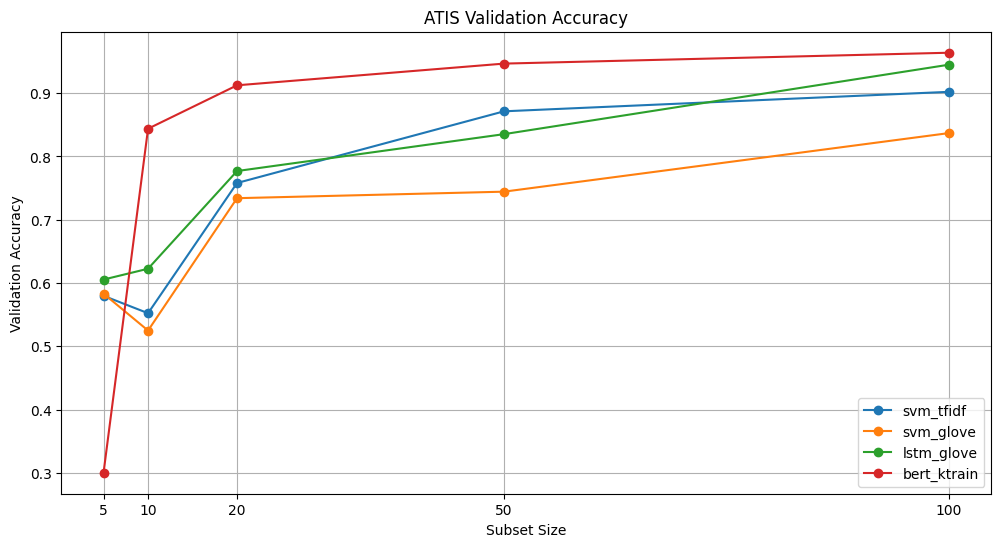

In [20]:
# Plot ATIS data
plt.figure(figsize=(12, 6))
for model in atis_data['model'].unique():
    subset = atis_data[atis_data['model'] == model]
    plt.plot(subset['subset_size'], subset['val_accuracy'], marker='o', label=model)

plt.title('ATIS Validation Accuracy')
plt.xlabel('Subset Size')
plt.ylabel('Validation Accuracy')
plt.xticks([5, 10, 20, 50, 100])
plt.legend()
plt.grid(True)
plt.show()

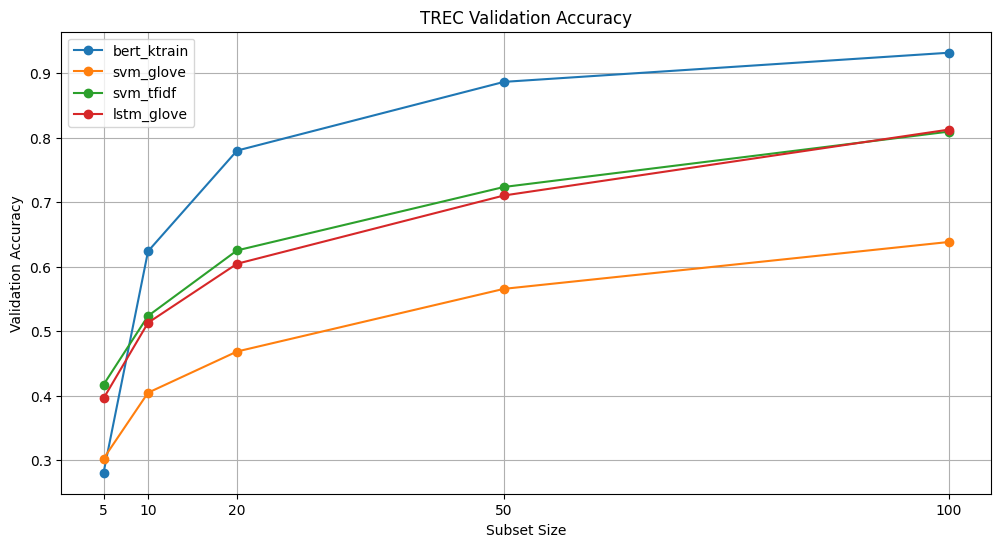

In [21]:
# Plot TREC data
plt.figure(figsize=(12, 6))
for model in trec_data['model'].unique():
    subset = trec_data[trec_data['model'] == model]
    plt.plot(subset['subset_size'], subset['val_accuracy'], marker='o', label=model)

plt.title('TREC Validation Accuracy')
plt.xlabel('Subset Size')
plt.ylabel('Validation Accuracy')
plt.xticks([5, 10, 20, 50, 100])
plt.legend()
plt.grid(True)
plt.show()